In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats
import numpy as np

In [3]:
df = pd.read_excel("0728_2000Microns_5thMsmt.xlsx")
df

,Cab.Bridge,Voltage steps,V(PZT),V(PZT).1,Voltage diff,real_V,M-E Sensor (Channel 1),ME_D_CH1,ME_A_dis_CH1,M-E Sensor (Channel 2),ME_D_CH2,ME_A_dis_CH2,Fringes,Fringe_D,fringe_A_dis,Time
0,(bit),NaN,(monitor)(before entering code),(after entering code),NaN,NaN,(microns),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65535,NaN,0,NaN,NaN,NaN,1858.31,NaN,NaN,1321.97,NaN,NaN,NaN,NaN,NaN,09:51:00
2,29622,NaN,0,0.652,NaN,6.52,1858.31,NaN,NaN,1322.01,0.04,0.04,NaN,NaN,NaN,09:52:00
3,30022,NaN,0.665,1.738,1.086,17.38,1864.87,6.56,6.56,1328.48,6.47,6.51,22.0,6.9608,6.9608,09:56:00
4,30422,NaN,1.71,2.532,0.794,25.32,1871.46,6.59,13.15,1334.89,6.41,12.92,22.0,6.9608,13.9216,09:59:00
5,30822,NaN,2.498,3.296,0.764,32.96,1878.13,6.67,19.82,1341.38,6.49,19.41,24.0,7.5936,21.5152,10:00:00
6,31222,NaN,3.225,4.05,0.754,40.50,1884.77,6.64,26.46,1347.88,6.50,25.91,21.0,6.6444,28.1596,10:04:00
7,31622,NaN,3.99,4.78,0.730,47.80,1891.47,6.70,33.16,1354.41,6.53,32.44,22.0,6.9608,35.1204,10:06:00
8,32022,NaN,4.71,5.5,0.720,55.00,1898.21,6.74,39.90,1360.97,6.56,39.00,21.0,6.6444,41.7648,10:09:00
9,32422,NaN,5.44,6.25,0.750,62.50,1904.98,6.77,46.67,1367.55,6.58,45.58,24.0,7.5936,49.3584,10:11:00


In [4]:
#column of sensor 1 (channel 1)
ME_A_dis_CH1 = df["ME_A_dis_CH1"][3:27]
print(ME_A_dis_CH1)

3      6.56
4     13.15
5     19.82
6     26.46
7     33.16
8     39.90
9     46.67
10    53.05
11    60.98
12    68.96
13    60.96
14    52.99
15    46.60
16    39.80
17    33.03
18    26.31
19    19.62
20    12.94
21     6.35
22    -0.20
23    -6.70
24   -13.16
25   -19.99
Name: ME_A_dis_CH1, dtype: float64


In [5]:
#column of sensor 2 (channel 2)
ME_A_dis_CH2 = df["ME_A_dis_CH2"][3:27]
print(ME_A_dis_CH2)

3      6.51
4     12.92
5     19.41
6     25.91
7     32.44
8     39.00
9     45.58
10    51.78
11    59.49
12    67.24
13    59.51
14    51.80
15    45.63
16    39.06
17    32.52
18    26.01
19    19.54
20    13.08
21     6.70
22     0.36
23    -5.93
24   -12.19
25   -18.80
Name: ME_A_dis_CH2, dtype: float64


In [6]:
fringe_A_dis = df["fringe_A_dis"][3:27]
print(fringe_A_dis)

3      6.9608
4     13.9216
5     21.5152
6     28.1596
7     35.1204
8     41.7648
9     49.3584
10    56.3192
11    64.2292
12    71.8228
13    63.5964
14    55.6864
15    48.4092
16    41.4484
17    34.8040
18    28.4760
19    21.1988
20    13.6052
21     5.6952
22    -0.3164
23    -6.6444
24   -13.2888
25   -19.9332
Name: fringe_A_dis, dtype: float64


In [7]:
real_V = df["real_V"][3:27]
print(real_V)

3     17.38
4     25.32
5     32.96
6     40.50
7     47.80
8     55.00
9     62.50
10    68.70
11    77.60
12    86.40
13    70.60
14    58.20
15    49.50
16    40.70
17    32.48
18    25.18
19    17.72
20    10.63
21     4.12
22    -1.70
23    -8.28
24   -14.33
25   -20.58
Name: real_V, dtype: float64


In [8]:
x1 = fringe_A_dis
y1 = ME_A_dis_CH1

info = stats.linregress(x1,y1)
info

LinregressResult(slope=0.9585555678417418, intercept=-0.31375502797587274, rvalue=0.9998429443116379, pvalue=2.849343835958443e-38, stderr=0.003707666311883076, intercept_stderr=0.14230551789042759)

<IPython.core.display.Javascript object>


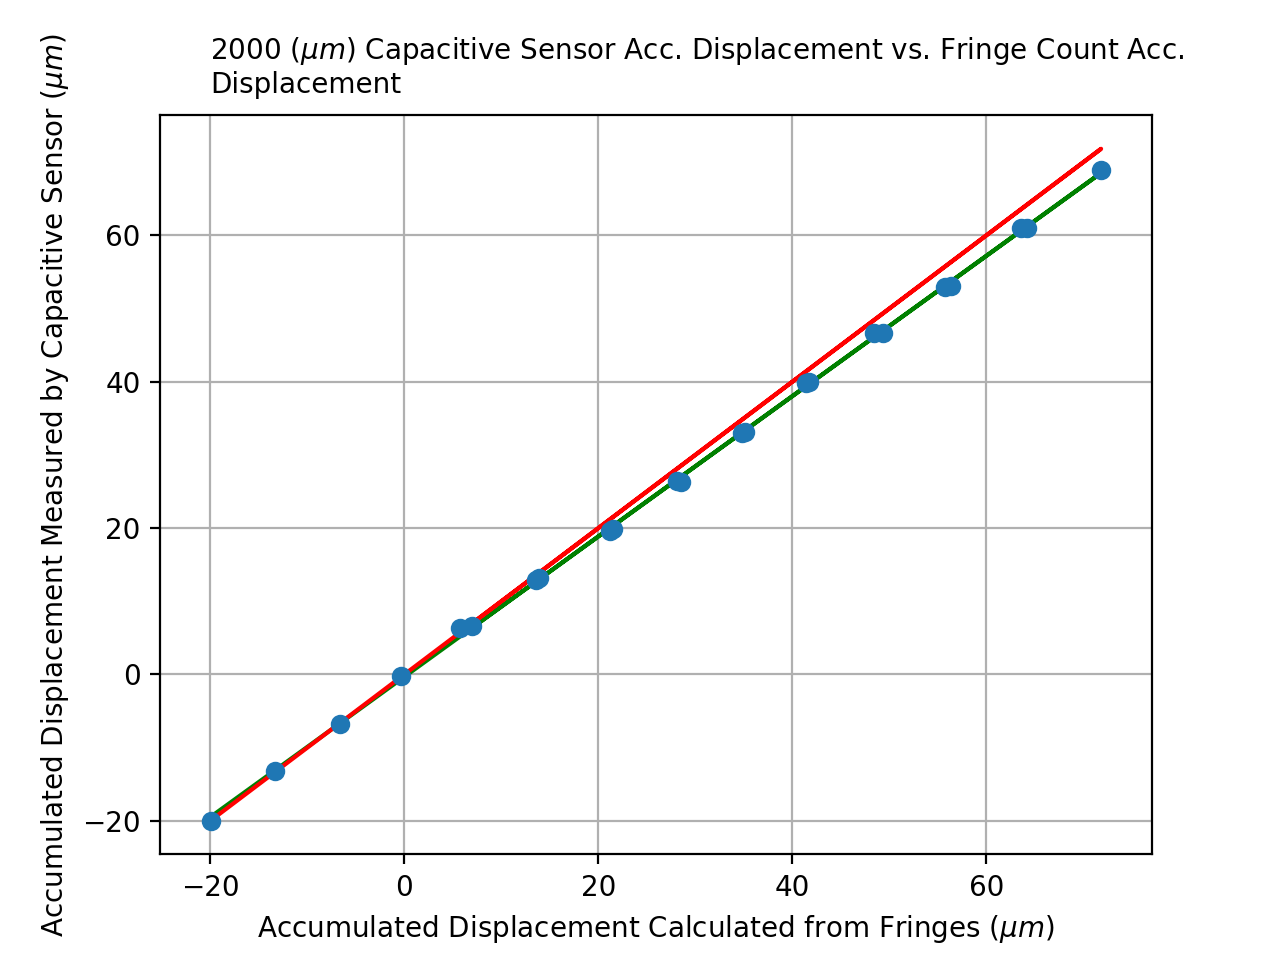

<function matplotlib.pyplot.show(block=None)>

In [13]:
#x error is 0.6
xerror = np.full_like(x1,0.6)
yerror = np.full_like(y1,0)

# plot of linear regression of data
plt.plot(x1,x1*info.slope+info.intercept,c = "green")

# plot of fringe displacement data, our "true" measurement
plt.plot(x1,x1,c = "red")

plt.errorbar(x1,y1,xerr=xerror,yerr=yerror,fmt = 'o')#,c = "orange")



plt.xlabel('Accumulated Displacement Calculated from Fringes ($\mu m$)')
plt.ylabel('Accumulated Displacement Measured by Capacitive Sensor ($\mu m$)')

t = '2000 ($\mu m$) Capacitive Sensor Acc. Displacement vs. Fringe Count Acc. Displacement'
plt.text(-20, 80, t, ha='left', rotation=0, wrap=True)



plt.grid()
plt.show

<IPython.core.display.Javascript object>


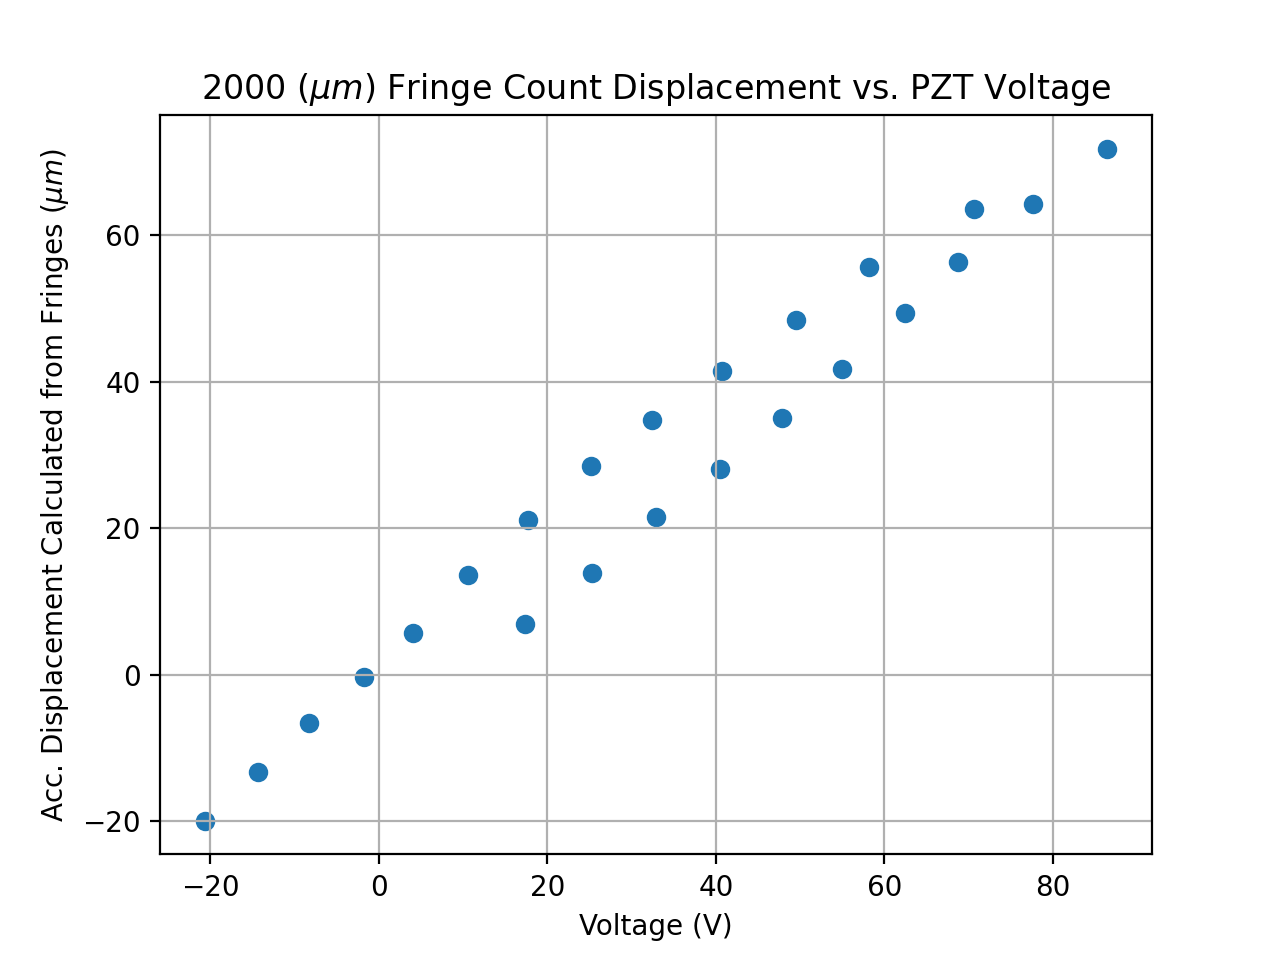

<function matplotlib.pyplot.show(block=None)>

In [14]:
plt.close("all")
x2 = real_V
y2 = fringe_A_dis

plt.scatter(x2,y2)


plt.xlabel('Voltage (V)')
plt.ylabel('Acc. Displacement Calculated from Fringes ($\mu m$)')
plt.title('2000 ($\mu m$) Fringe Count Displacement vs. PZT Voltage')


plt.grid()
plt.show

In [15]:
x3 = ME_A_dis_CH2
y3 = ME_A_dis_CH1

info_Sensors = stats.linregress(x3,y3)
info_Sensors

LinregressResult(slope=1.0332793258660602, intercept=-0.47227449022181034, rvalue=0.9999861100140367, pvalue=2.4821038874362185e-49, stderr=0.0011884434411573719, intercept_stderr=0.0424549933934988)

<IPython.core.display.Javascript object>


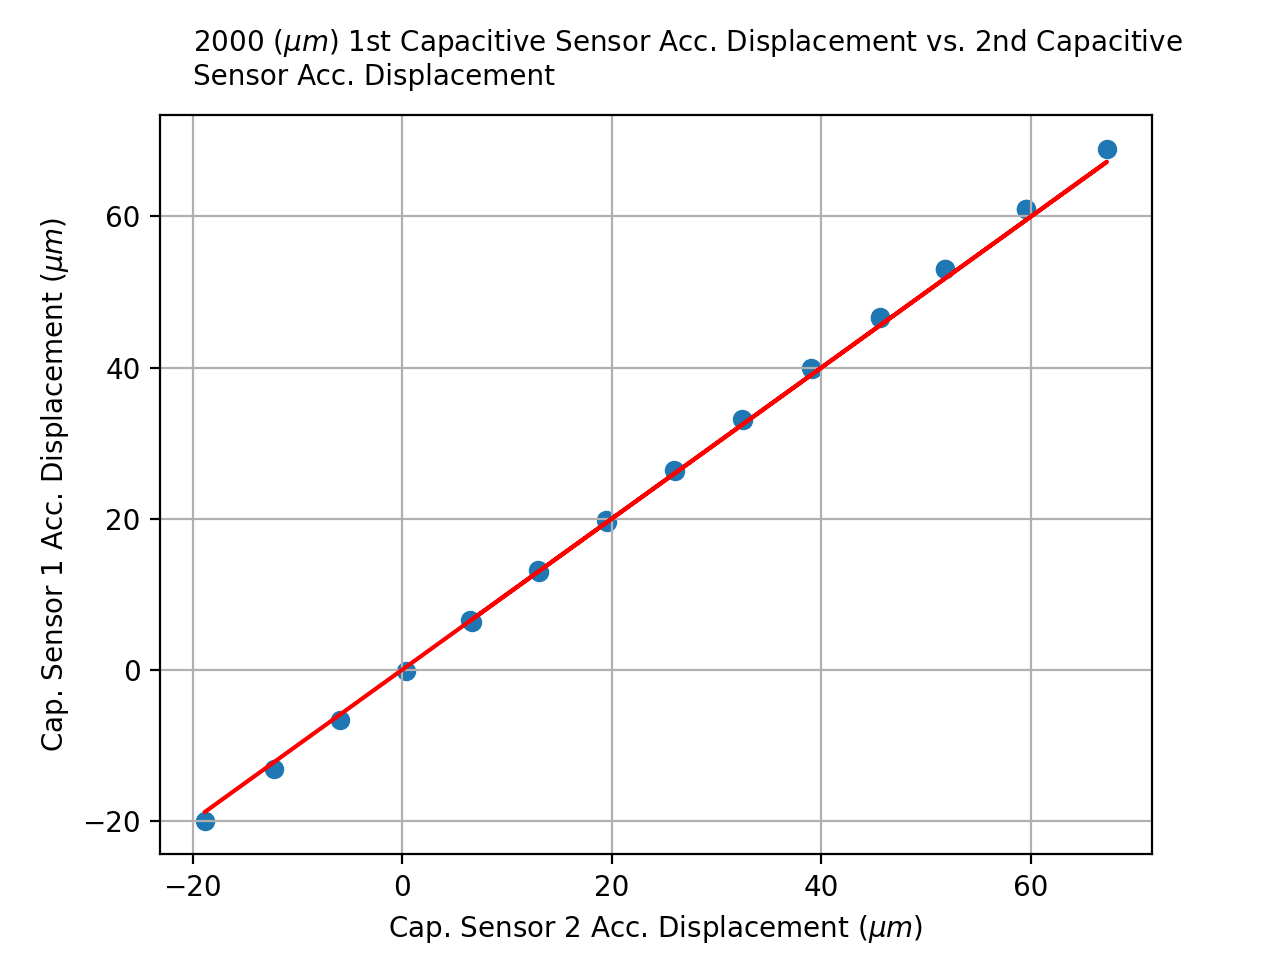

<function matplotlib.pyplot.show(block=None)>

In [21]:
#plot of first sensor vs. second sensor
plt.close("all")

#plot of our reference data, channel 2
plt.plot(x3,x3,c = "red")


plt.scatter(x3,y3)


plt.xlabel('Cap. Sensor 2 Acc. Displacement ($\mu m$)')
plt.ylabel('Cap. Sensor 1 Acc. Displacement ($\mu m$)')
t = '2000 ($\mu m$) 1st Capacitive Sensor Acc. Displacement vs. 2nd Capacitive Sensor Acc. Displacement'
plt.text(-20, 78, t, ha='left', rotation=0, wrap=True)


plt.grid()
plt.show